In [ ]:
# Panda will be usefull for quick data parsing
import pandas as pd
import numpy as np
import io
from google.colab import files
uploaded = files.upload()

for name, data in uploaded.items():
  with open(name, 'wb') as f:
    f.write(data)
    print ('saved file', name)

Saving data.csv to data.csv
saved file data.csv


In [ ]:
import matplotlib.pyplot as pl

df = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))


In [ ]:
#Removing the columns which are not relevant, once done, this does not need to be done again
df.drop('id', axis=1, inplace = True)
df.drop("Unnamed: 32",axis=1,inplace=True)

#We need to remap the values for malignant and benign to being 1 or 0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [ ]:
#splitting the data into the 3 different sets provided
features_mean = list(df.columns[0:11])
features_se = list(df.columns[11:21])
features_worst = list(df.columns[21:31])

#print the lists so we can make sure it worked correctly
print (features_mean)
print (features_se)
print (features_worst)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


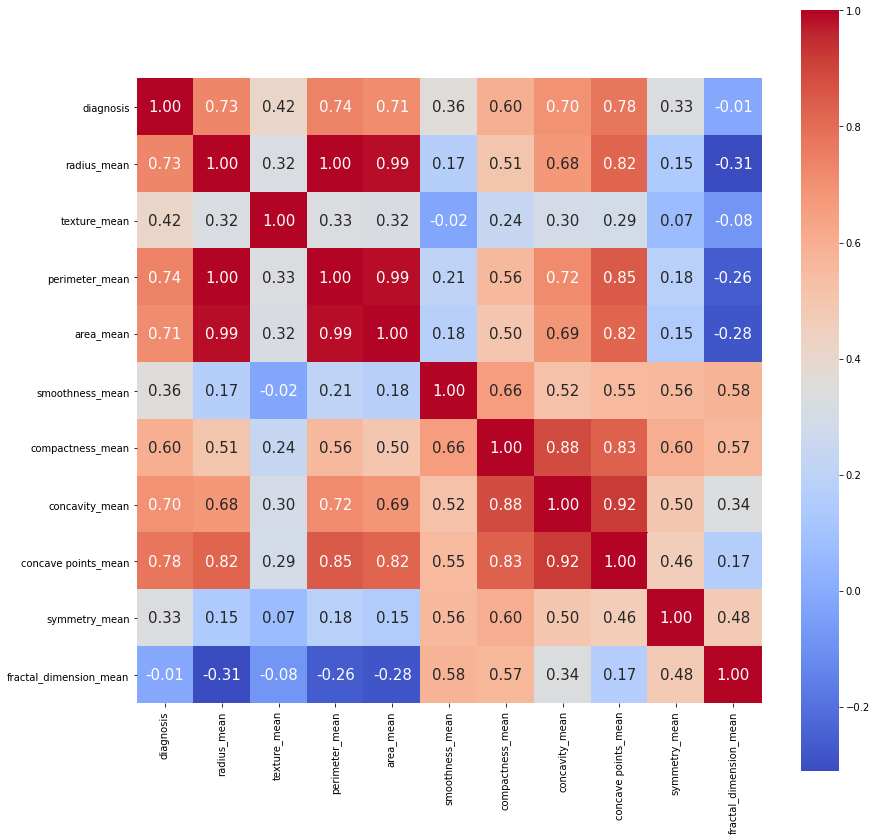

In [ ]:
#Let's look at the correlations between the features of the dataset
import seaborn as sns
import matplotlib.pyplot as plt


corr = df[features_mean].corr()
plt.figure(figsize =(14,14))

sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')

In [ ]:
prediction_var = ['perimeter_mean', 'compactness_mean', 'concavity_mean']

In [ ]:
from sklearn.model_selection import train_test_split # module to split the data into two parts

#split data into 85% being used for training, and 15% for testing
train, test = train_test_split(df, test_size = 0.15)
print ("Train shape", train.shape)
print ("Test shape", test.shape)

#setup the structure of the training data
train_x = train[prediction_var]
train_y = train.diagnosis

test_x = test[prediction_var]
test_y = test.diagnosis

Train shape (483, 31)
Test shape (86, 31)


In [ ]:
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn import metrics # for the check the error and accuracy of the model


model = RandomForestClassifier(n_estimators=300)  

In [ ]:
model.fit(train_x, train_y)

prediction = model.predict(test_x)
print ("Accuracy =", metrics.accuracy_score(prediction, test_y))

Accuracy = 0.9418604651162791


In [ ]:
prediction_var = ['perimeter_mean', 'compactness_mean', 'concavity_mean', 'texture_mean']

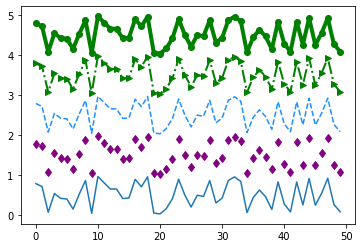

In [ ]:
# Create random datasets with numpy random module
x = np.arange(50)
y = np.random.rand(50)

#Plot y using default line style and color x is automatically inferred
pl.plot(y)

# Plot x and y without line and purple diamon markers
pl.plot(x, y+1, marker ='d', linewidth=0, color="purple")

# Plot x and y using dotted line and 
pl.plot(x, y+2, color = 'dodgerblue', linestyle='--')

# Plot x and y using blue circle markers
pl.plot(x, y+3, color='green', linewidth=2, marker='>', linestyle="-.")

# Plot x and y using blue circle markers
pl.plot(x, y+4, color='green', linewidth=4, marker='o', linestyle="-")

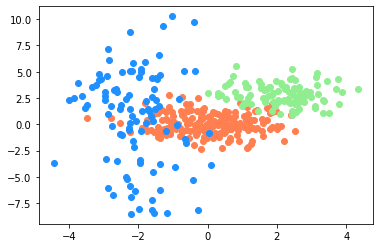

In [ ]:
pl.scatter (np.random.randn(200),np.random.randn(200), color="coral")
pl.scatter (np.random.randn(100)+2,np.random.randn(100)+3, color="lightgreen")
pl.scatter (np.random.randn(100)-2,np.random.randn(100)*4, color="dodgerblue")

In [ ]:
np.random.randn(5)

array([ 0.85064837,  0.79661067, -0.30008613, -0.16191851, -1.15357223])